<a href="https://colab.research.google.com/github/AdamStajer07/pytorchTutorial/blob/main/PyTorchReview2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import make_circles

In [2]:
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})

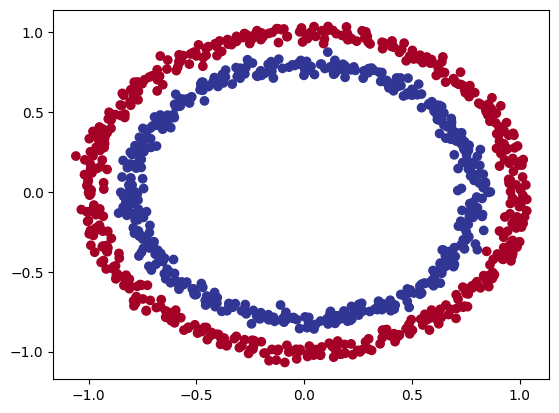

In [4]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [5]:
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=15)
    self.layer_2 = nn.Linear(in_features=15, out_features=15)
    self.layer_3 = nn.Linear(in_features=15, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model = CircleModel()
model

CircleModel(
  (layer_1): Linear(in_features=2, out_features=15, bias=True)
  (layer_2): Linear(in_features=15, out_features=15, bias=True)
  (layer_3): Linear(in_features=15, out_features=1, bias=True)
  (relu): ReLU()
)

In [7]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [8]:
torch.manual_seed(42)

epochs = 1500

for epoch in range(epochs):
  model.train()

  y_logits = model(X_train).squeeze()
  loss = loss_fn(y_logits, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_test).squeeze()
    test_loss = loss_fn(test_logits, y_test)

  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | loss: {loss} | test_loss: {test_loss}')



Epoch: 0 | loss: 0.6944016218185425 | test_loss: 0.6942527890205383
Epoch: 100 | loss: 0.6889010667800903 | test_loss: 0.6886098980903625
Epoch: 200 | loss: 0.6837484240531921 | test_loss: 0.6840198636054993
Epoch: 300 | loss: 0.675851583480835 | test_loss: 0.6779880523681641
Epoch: 400 | loss: 0.6637744903564453 | test_loss: 0.6700842380523682
Epoch: 500 | loss: 0.6434209942817688 | test_loss: 0.6572566032409668
Epoch: 600 | loss: 0.6046925783157349 | test_loss: 0.6260530948638916
Epoch: 700 | loss: 0.52787846326828 | test_loss: 0.5564608573913574
Epoch: 800 | loss: 0.3990120589733124 | test_loss: 0.4367380142211914
Epoch: 900 | loss: 0.25190064311027527 | test_loss: 0.2953282594680786
Epoch: 1000 | loss: 0.14740963280200958 | test_loss: 0.18832655251026154
Epoch: 1100 | loss: 0.09140559285879135 | test_loss: 0.12717582285404205
Epoch: 1200 | loss: 0.06082822009921074 | test_loss: 0.09173209965229034
Epoch: 1300 | loss: 0.04318798705935478 | test_loss: 0.06996576488018036
Epoch: 1400 

In [9]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

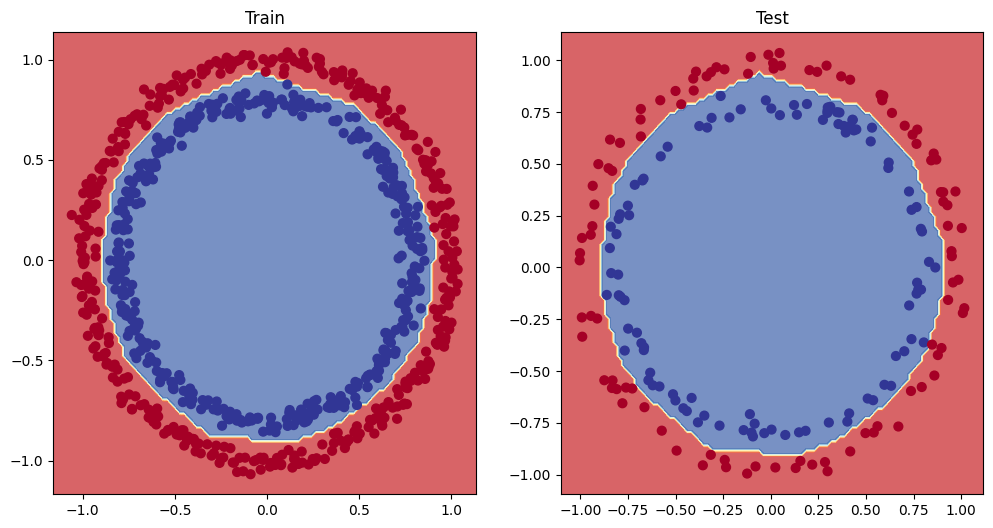

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815]]),
 tensor([3, 2, 2, 1, 1]),
 tensor([0, 1, 2, 3]),
 <function Tensor.type>,
 <function Tensor.type>)

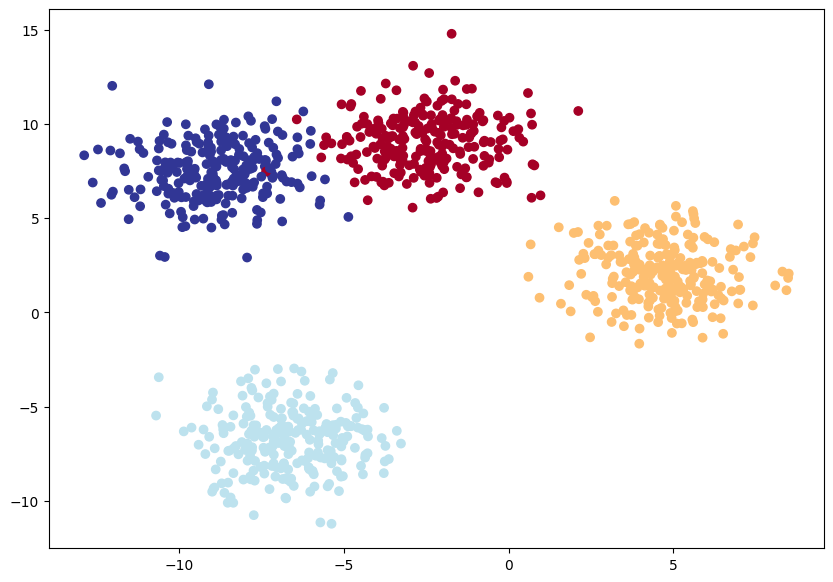

In [32]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)
X_blob[:5], y_blob[:5], torch.unique(y_blob), X_blob.type, y_blob.type

In [28]:
class MultiClassModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=64)
    self.layer_2 = nn.Linear(in_features=64, out_features=64)
    self.layer_3 = nn.Linear(in_features=64, out_features=4)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model = MultiClassModel()
model

MultiClassModel(
  (layer_1): Linear(in_features=2, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=4, bias=True)
  (relu): ReLU()
)

In [29]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [35]:
torch.manual_seed(42)

epochs = 100

for epoch in range(epochs):
  model.train()

  y_logits = model(X_blob_train)

  loss = loss_fn(y_logits, y_blob_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()
  with torch.inference_mode():
    test_logits = model(X_blob_test)
    test_loss = loss_fn(test_logits, y_blob_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | loss: {loss:.4f} | test loss: {test_loss:.4f}")

Epoch: 0 | loss: 0.0295 | test loss: 0.0203
Epoch: 10 | loss: 0.0290 | test loss: 0.0196
Epoch: 20 | loss: 0.0286 | test loss: 0.0191
Epoch: 30 | loss: 0.0283 | test loss: 0.0186
Epoch: 40 | loss: 0.0280 | test loss: 0.0182
Epoch: 50 | loss: 0.0277 | test loss: 0.0179
Epoch: 60 | loss: 0.0275 | test loss: 0.0176
Epoch: 70 | loss: 0.0273 | test loss: 0.0173
Epoch: 80 | loss: 0.0271 | test loss: 0.0170
Epoch: 90 | loss: 0.0270 | test loss: 0.0168


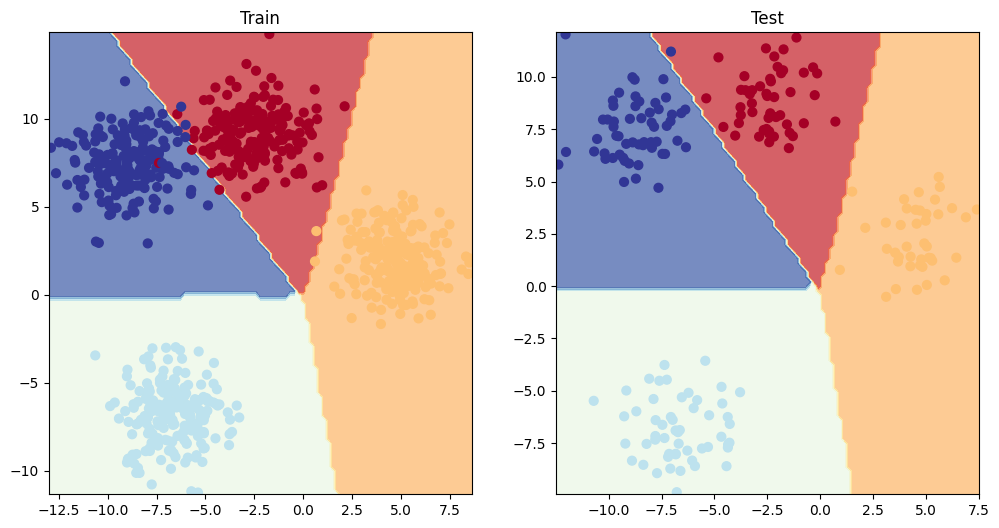

In [36]:
model.eval()
with torch.inference_mode():
  y_logits = model(X_blob_test)
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_blob_test, y_blob_test)